# Pymaceuticals Inc.
---

### Analysis

- Average tumor volume caused by squamous cell carcinoma, reduced considerable by Capomulin treatment.
- Tumor volume increased when Capomulin dose was administered and then decreased.
- Mice weight increased as the average tumor volume increased.
- Skeweness : Rapomulin =  - 0.5298
              Ramicane =   - 0.282
- Correlation :  The correlation between mouse weight and the average tumor volume is 0.84, hence there is a positive correlation between mouse weight and average tumor volume.             


Conclusions :  
   Capomulin treatment shows positive effect in the reduction of tumor volume.
   Drug Ramicane also was effective in reducing tumor volume. 
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
Combined_Mouse_Data_df = pd.merge(study_results, mouse_metadata, how ='left', on="Mouse ID")

# Display the data table for preview
Combined_Mouse_Data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
Total_Mice = len(Combined_Mouse_Data_df["Mouse ID"].unique())
Total_Mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Mice_ID = Combined_Mouse_Data_df.loc[Combined_Mouse_Data_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
Duplicate_Mice_ID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_Mice_Data =Combined_Mouse_Data_df[Combined_Mouse_Data_df["Mouse ID"] == "g989"]
Duplicate_Mice_Data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_Data_Clean = Combined_Mouse_Data_df[Combined_Mouse_Data_df["Mouse ID"].isin(Duplicate_Mice_ID) ==False]
Mouse_Data_Clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
Updated_Mice_Count=len(Mouse_Data_Clean["Mouse ID"].unique())
Updated_Mice_Count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_TV = Mouse_Data_Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_TV = Mouse_Data_Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Variance_TV = Mouse_Data_Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
StdDev_TV = Mouse_Data_Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
StdErr_TV = Mouse_Data_Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Summary_Data_Table = pd.DataFrame(
    {
        "Mean Tumor Volume" : Mean_TV,
        "Median Tumor Volume" : Median_TV,
        "Tumor Volume Variance" : Variance_TV,
        "Tumor Volume Std. Dev." : StdDev_TV,
        "Tumor Volume Std. Err." : StdErr_TV
    }) 
Summary_Data_Table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Aggragate_Methof_Summary = Mouse_Data_Clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
AggSummary_Data_Table = pd.DataFrame(
    {
        "Mean Tumor Volume" : Mean_TV,
        "Median Tumor Volume" : Median_TV,
        "Tumor Volume Variance" : Variance_TV,
        "Tumor Volume Std. Dev." : StdDev_TV,
        "Tumor Volume Std. Err." : StdErr_TV
    }) 
AggSummary_Data_Table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

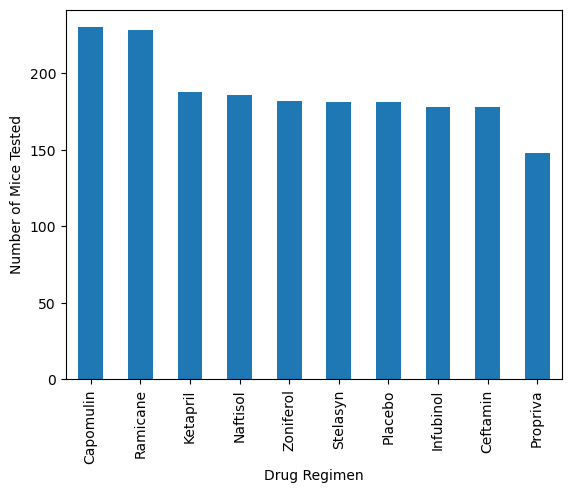

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Count_for_Each_Drug=Mouse_Data_Clean["Drug Regimen"].value_counts()
Count_for_Each_Drug.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

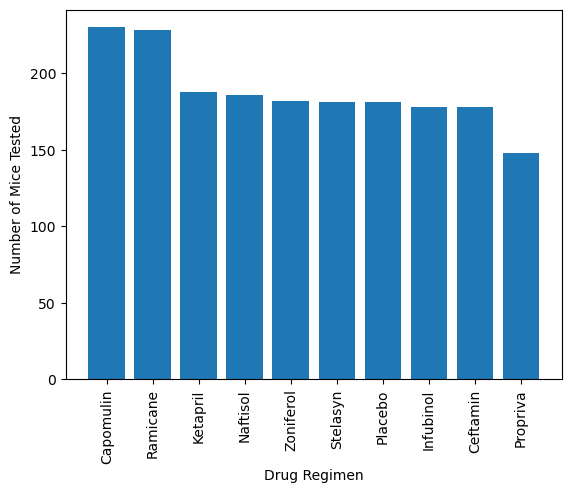

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(Count_for_Each_Drug.index.values, Count_for_Each_Drug.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

<Axes: ylabel='count'>

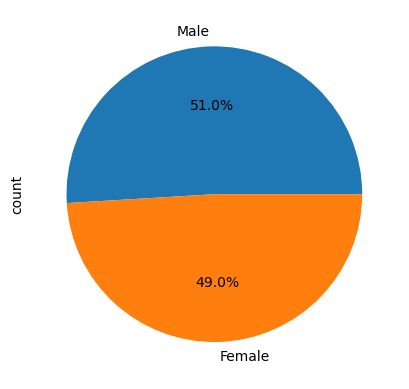

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_Count = Mouse_Data_Clean.Sex.value_counts()

Gender_Count.plot(kind="pie",  autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

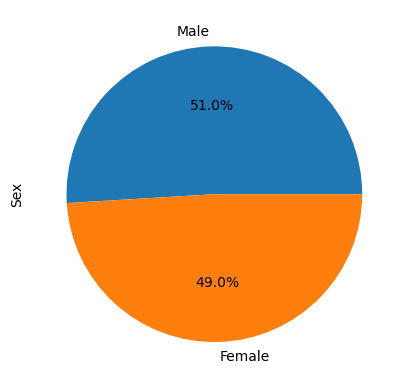

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Gender_Count.values, labels=Gender_Count.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Max_Time_Point= Mouse_Data_Clean.groupby(["Mouse ID"])["Timepoint"].max()
Max_Time_Point=Max_Time_Point.reset_index()
Max_Time_Point

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merged_Clean_MaxTimepoint = pd.merge(Max_Time_Point, Mouse_Data_Clean, on=["Mouse ID", "Timepoint"], how = "left")
Merged_Clean_MaxTimepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
Treated_With =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_Data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Treated_With: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Final_Tumor_Volume = Merged_Clean_MaxTimepoint.loc[Merged_Clean_MaxTimepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    Tumor_Vol_Data.append(Final_Tumor_Volume)
    
    # Determine outliers using upper and lower bounds
    Quartiles = Final_Tumor_Volume.quantile([.25, .5, .75])
    LowerQuart = Quartiles[0.25]
    UpperQuart = Quartiles[0.75]
    iqr = UpperQuart-LowerQuart
    
    LowerBound = LowerQuart - (1.5 * iqr)
    UpperBound = UpperQuart + (1.5 * iqr)
    
    Outliers = Final_Tumor_Volume.loc[(Final_Tumor_Volume < LowerBound) |  (Final_Tumor_Volume > UpperBound)]

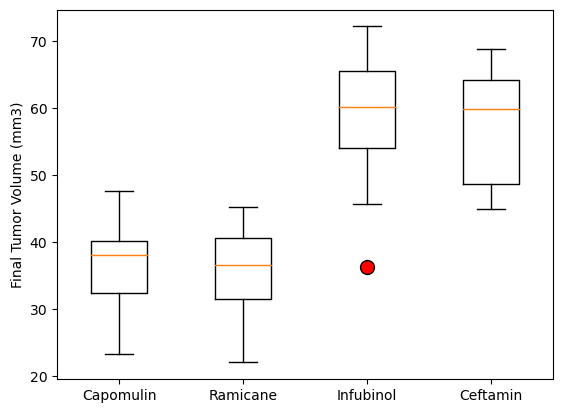

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
OutlierPoint = dict(markerfacecolor="red", markersize = 10)
plt.boxplot(Tumor_Vol_Data, labels=Treated_With, flierprops=OutlierPoint)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

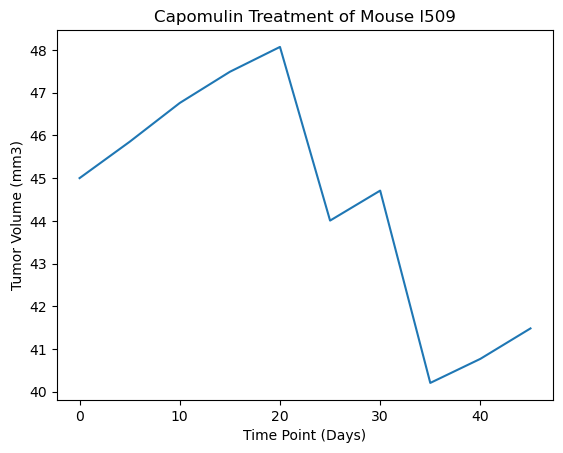

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Drug_Capomulin_Table = Mouse_Data_Clean[Mouse_Data_Clean["Drug Regimen"] == "Capomulin"]

#Drug_Capomulin_Table["Mouse ID"].unique()
Single_Mouse_Data = Drug_Capomulin_Table[Drug_Capomulin_Table["Mouse ID"] == "l509"]
Single_Mouse_Data
plt.plot(Single_Mouse_Data["Timepoint"], Single_Mouse_Data["Tumor Volume (mm3)"])
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

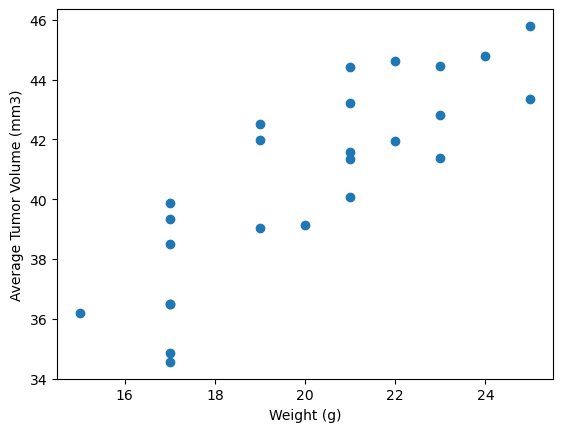

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Drug_Capomulin_Table = Mouse_Data_Clean[Mouse_Data_Clean["Drug Regimen"] == "Capomulin"]
Drug_Capomulin_Table
Average_Tumor = Drug_Capomulin_Table.groupby(["Mouse ID"]).agg({
    "Tumor Volume (mm3)":"mean", 
    "Weight (g)":"mean"})

#Average_Tumor
plt.scatter(Average_Tumor["Weight (g)"], Average_Tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


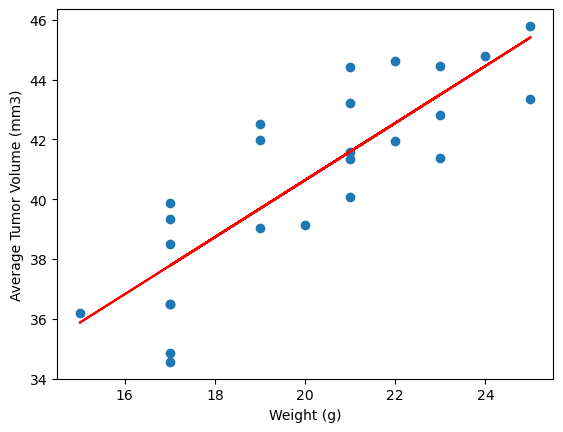

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Correlation= st.pearsonr(Average_Tumor["Weight (g)"], Average_Tumor["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(Correlation[0],2)}")
Linear_Regression = st.linregress(Average_Tumor["Weight (g)"], Average_Tumor["Tumor Volume (mm3)"])
Linear_Regression
Slope = Linear_Regression[0]
Intercept=Linear_Regression[1]

y_values = Average_Tumor["Weight (g)"] * Slope + Intercept

plt.scatter(Average_Tumor["Weight (g)"], Average_Tumor["Tumor Volume (mm3)"])
plt.plot(Average_Tumor["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()